In [2]:
from fastai.vision.all import * 

In [3]:
Data_path = Path('/mnt/c/python/projects/dl_practice/archive/train')

In [4]:
mask_datablock = DataBlock(
    get_items=get_image_files,
    get_y=parent_label,
    blocks=(ImageBlock, CategoryBlock),
    item_tfms=RandomResizedCrop(224, min_scale=.3),
    splitter=RandomSplitter(valid_pct=.2, seed=100),
    batch_tfms=aug_transforms(mult=2))

In [5]:
dls = mask_datablock.dataloaders(Data_path)

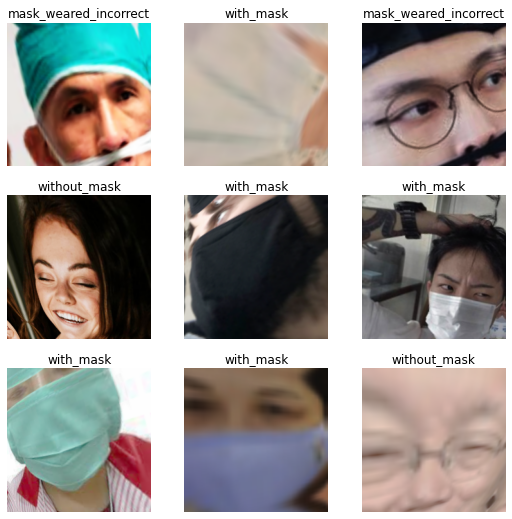

In [6]:
dls.show_batch()

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [8]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.677127,0.679855,0.272727,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.963646,0.570912,0.201299,00:09
1,0.910125,0.493898,0.194805,00:08
2,0.808558,0.438668,0.162338,00:08
3,0.736630,0.400804,0.149351,00:08


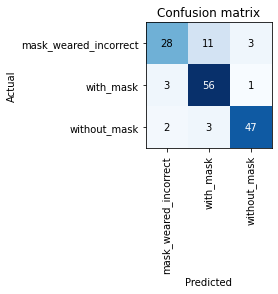

In [18]:
matrix = ClassificationInterpretation.from_learner(learn)
matrix.plot_confusion_matrix()

In [9]:
learn.export(fname='mask_export.pkl')

In [19]:
predict_file_path = '/mnt/c/python/projects/dl_practice/predict_photos'

In [20]:
predict_file = predict_file_path + '/not_wearing_mask_right_stock_photo.jpg'

In [16]:
learn.predict(predict_file)

('mask_weared_incorrect', tensor(0), tensor([0.8988, 0.0787, 0.0224]))